# cifar-10 CNN实现

In [37]:
import torch
from torch.autograd import Variable
import torch.nn as nn
from torchvision import datasets,transforms

In [38]:
train_dataset = datasets.CIFAR10('data/cifar10', download=True,train=True, 
                                 transform=transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                 ]))
test_dataset = datasets.CIFAR10('data/cifar10', 
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                ]))

Files already downloaded and verified


In [39]:
train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=64)

In [40]:
cuda = torch.cuda.is_available()

In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self,x):
        in_size = x.size(0)
        out = self.relu(self.mp(self.conv1(x)))
        out = self.relu(self.mp(self.conv2(out)))
        out = out.view(in_size, -1)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return self.logsoftmax(out)

In [42]:
if cuda:
    model = Net().cuda()
else:
    model = Net()

In [43]:
loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-2,momentum=0.9)

In [45]:
for epoch in range(10):
    for t, (data, target) in enumerate(train_loader):
        if cuda:
            data,target = Variable(data.cuda()),Variable(target.cuda())
        else:
            data,target = Variable(data),Variable(target)
        pred = model(data)
        loss = loss_fn(pred,target)
        print(epoch,t,loss.data[0])
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

0 0 1.1737722158432007
0 1 1.2053340673446655
0 2 1.2463781833648682
0 3 1.1570590734481812
0 4 1.131098747253418
0 5 1.2211052179336548
0 6 1.2973930835723877
0 7 1.2004070281982422
0 8 1.0830645561218262
0 9 1.2282695770263672
0 10 1.2363396883010864
0 11 1.2360254526138306
0 12 1.146990180015564
0 13 1.1835211515426636
0 14 1.0550692081451416
0 15 1.0351686477661133
0 16 0.933488130569458
0 17 1.1842519044876099
0 18 1.2573713064193726
0 19 0.9094619750976562
0 20 0.9825390577316284
0 21 1.0299501419067383
0 22 0.904239296913147
0 23 1.1891289949417114
0 24 1.2834842205047607
0 25 1.1622592210769653
0 26 1.0532872676849365
0 27 1.08946692943573
0 28 1.0173219442367554
0 29 1.6015000343322754
0 30 1.175652027130127
0 31 1.0520820617675781
0 32 0.9971722960472107
0 33 1.144558072090149
0 34 1.132825255393982
0 35 1.113235354423523
0 36 0.9869466423988342
0 37 1.3125519752502441
0 38 1.1979930400848389
0 39 1.0017904043197632
0 40 1.080198884010315
0 41 0.9900252223014832
0 42 1.143206

0 338 1.1761665344238281
0 339 0.8482620120048523
0 340 0.9193581938743591
0 341 0.9017500281333923
0 342 1.1249809265136719
0 343 1.0012675523757935
0 344 1.0241121053695679
0 345 1.1403225660324097
0 346 1.012912631034851
0 347 1.0856021642684937
0 348 1.1181846857070923
0 349 1.1810647249221802
0 350 0.9358615875244141
0 351 0.8347944617271423
0 352 1.0153541564941406
0 353 1.084760308265686
0 354 1.1942538022994995
0 355 1.0231547355651855
0 356 1.144007921218872
0 357 1.1620997190475464
0 358 1.1358789205551147
0 359 1.0339162349700928
0 360 1.1920064687728882
0 361 0.7833675146102905
0 362 1.1147202253341675
0 363 0.8451949954032898
0 364 1.0179760456085205
0 365 0.9970846772193909
0 366 0.9848620891571045
0 367 0.914918065071106
0 368 0.9307064414024353
0 369 0.9544612765312195
0 370 1.0024051666259766
0 371 1.010884404182434
0 372 1.1686409711837769
0 373 0.8374433517456055
0 374 1.0118975639343262
0 375 0.9637399315834045
0 376 1.0860066413879395
0 377 1.2405078411102295
0 378

0 671 1.1950942277908325
0 672 0.8499359488487244
0 673 1.1022183895111084
0 674 0.9409663677215576
0 675 0.9445745348930359
0 676 0.9192909002304077
0 677 1.093520164489746
0 678 0.9998759031295776
0 679 0.8675224184989929
0 680 0.8678660988807678
0 681 1.094091534614563
0 682 1.2071824073791504
0 683 1.0367262363433838
0 684 0.8137950897216797
0 685 0.9309881925582886
0 686 1.1381144523620605
0 687 1.1053345203399658
0 688 1.1991819143295288
0 689 0.849115788936615
0 690 0.9470574855804443
0 691 1.0765604972839355
0 692 1.2683122158050537
0 693 0.9646626114845276
0 694 1.0244077444076538
0 695 1.1243077516555786
0 696 0.9697051048278809
0 697 1.2254652976989746
0 698 1.0845386981964111
0 699 0.9346153736114502
0 700 1.0770034790039062
0 701 1.0140774250030518
0 702 1.2672909498214722
0 703 0.919381320476532
0 704 0.8743704557418823
0 705 1.0774915218353271
0 706 0.9793987274169922
0 707 0.7438803911209106
0 708 1.0703166723251343
0 709 0.9354813694953918
0 710 0.9537681341171265
0 71

1 226 0.9962185621261597
1 227 0.7224686145782471
1 228 0.9877859354019165
1 229 0.9758908748626709
1 230 1.1949164867401123
1 231 0.7806668877601624
1 232 0.7534855604171753
1 233 1.19823157787323
1 234 1.0801966190338135
1 235 0.6200785040855408
1 236 1.0950556993484497
1 237 1.0878220796585083
1 238 1.000732183456421
1 239 0.6638884544372559
1 240 1.2946720123291016
1 241 0.9725708961486816
1 242 0.912997305393219
1 243 0.7756077647209167
1 244 0.9519535303115845
1 245 0.852577269077301
1 246 0.9863627552986145
1 247 0.8874989151954651
1 248 1.010270595550537
1 249 0.8114902377128601
1 250 0.7255604267120361
1 251 1.0979714393615723
1 252 0.919097900390625
1 253 1.0050511360168457
1 254 1.0481232404708862
1 255 0.7485209107398987
1 256 0.6278089284896851
1 257 1.0270819664001465
1 258 0.9966321587562561
1 259 0.8745337724685669
1 260 0.8738374710083008
1 261 1.0747382640838623
1 262 0.9513533711433411
1 263 0.8641179800033569
1 264 0.779762864112854
1 265 0.9195346236228943
1 266 0.

1 556 0.7988402247428894
1 557 1.1195323467254639
1 558 0.9917055368423462
1 559 0.8924105167388916
1 560 0.875270664691925
1 561 0.9474223256111145
1 562 1.014979362487793
1 563 1.0540043115615845
1 564 0.7225098013877869
1 565 1.1011420488357544
1 566 0.833107590675354
1 567 0.8542879819869995
1 568 0.875101625919342
1 569 0.9518037438392639
1 570 0.8607771992683411
1 571 0.9862049221992493
1 572 1.1070629358291626
1 573 0.8577460050582886
1 574 0.8562775254249573
1 575 1.139816164970398
1 576 0.9006036520004272
1 577 0.8935657739639282
1 578 0.9387147426605225
1 579 0.8892557621002197
1 580 0.9029806852340698
1 581 0.7222845554351807
1 582 1.033539891242981
1 583 0.7865092754364014
1 584 0.9261184334754944
1 585 0.7365118861198425
1 586 0.7806612253189087
1 587 0.9093044400215149
1 588 1.0600179433822632
1 589 0.9691623449325562
1 590 0.8573448657989502
1 591 0.6894946098327637
1 592 1.116805076599121
1 593 0.9392791390419006
1 594 0.8867665529251099
1 595 0.96358323097229
1 596 0.8

2 110 0.5990363955497742
2 111 0.7684993743896484
2 112 0.7310991883277893
2 113 0.8753083944320679
2 114 0.7006843090057373
2 115 0.5462943315505981
2 116 0.7905555963516235
2 117 0.7225030660629272
2 118 1.0690699815750122
2 119 0.7109464406967163
2 120 0.6468695402145386
2 121 0.819527804851532
2 122 0.6411753296852112
2 123 0.8119423389434814
2 124 0.85477215051651
2 125 0.7477961182594299
2 126 0.8641096949577332
2 127 0.953721284866333
2 128 0.8635218143463135
2 129 0.6237947940826416
2 130 0.7120404243469238
2 131 0.6497943997383118
2 132 0.5959412455558777
2 133 0.5371442437171936
2 134 0.7553907036781311
2 135 0.6745357513427734
2 136 0.8322580456733704
2 137 0.6319958567619324
2 138 0.8144654035568237
2 139 0.6422082185745239
2 140 0.8179540038108826
2 141 0.8313582539558411
2 142 0.7368077635765076
2 143 0.7225523591041565
2 144 0.8385228514671326
2 145 0.7788244485855103
2 146 0.6765062212944031
2 147 0.8608616590499878
2 148 0.9519071578979492
2 149 0.8014592528343201
2 15

2 440 0.8524898886680603
2 441 0.6146923303604126
2 442 0.7951986193656921
2 443 0.9497858285903931
2 444 0.6391246318817139
2 445 0.637741208076477
2 446 0.7575229406356812
2 447 0.9393895864486694
2 448 0.8294598460197449
2 449 0.7198284268379211
2 450 0.7306902408599854
2 451 0.818058967590332
2 452 0.8602200746536255
2 453 0.6838366389274597
2 454 0.8598771691322327
2 455 0.7370328903198242
2 456 0.659920871257782
2 457 0.871640682220459
2 458 0.803245484828949
2 459 0.8561302423477173
2 460 0.603367269039154
2 461 0.8408244848251343
2 462 0.7296409010887146
2 463 0.7850327491760254
2 464 0.6767966151237488
2 465 0.6770265102386475
2 466 0.699364423751831
2 467 0.9444854259490967
2 468 0.7304309010505676
2 469 0.8576226830482483
2 470 0.6782207489013672
2 471 0.7504134774208069
2 472 0.6849947571754456
2 473 0.8590214252471924
2 474 0.7255427241325378
2 475 1.0515989065170288
2 476 0.8260136842727661
2 477 0.8326274752616882
2 478 0.9715975522994995
2 479 0.6311932802200317
2 480 0

2 770 0.9111233949661255
2 771 0.8715243339538574
2 772 1.1376749277114868
2 773 1.046473503112793
2 774 0.6154690384864807
2 775 0.9799184203147888
2 776 0.7583982348442078
2 777 0.9004491567611694
2 778 0.7771573066711426
2 779 0.9202014207839966
2 780 0.8325003385543823
2 781 0.6314310431480408
3 0 0.7836591005325317
3 1 1.0069156885147095
3 2 0.786949098110199
3 3 0.6648402214050293
3 4 0.8743788003921509
3 5 0.5288323760032654
3 6 0.7928879261016846
3 7 0.734400749206543
3 8 0.6850023865699768
3 9 0.6170794367790222
3 10 0.7159937620162964
3 11 0.7488957643508911
3 12 0.5624704957008362
3 13 0.78254234790802
3 14 0.49304771423339844
3 15 0.6278018355369568
3 16 0.5223255753517151
3 17 0.5221359729766846
3 18 0.7032926082611084
3 19 0.6546937823295593
3 20 0.5409650206565857
3 21 0.785670280456543
3 22 0.6297610998153687
3 23 0.745071530342102
3 24 0.49322623014450073
3 25 0.7245029211044312
3 26 0.5252120494842529
3 27 0.5763406753540039
3 28 0.9587627053260803
3 29 0.578471302986

3 322 0.6490432620048523
3 323 0.7280758023262024
3 324 0.5984381437301636
3 325 0.5971445441246033
3 326 0.7072079181671143
3 327 0.977188766002655
3 328 0.7556486129760742
3 329 0.6307971477508545
3 330 0.6394914984703064
3 331 0.7071414589881897
3 332 0.6639003157615662
3 333 0.5471237897872925
3 334 0.45514729619026184
3 335 0.46481937170028687
3 336 0.6662932634353638
3 337 0.7422828674316406
3 338 0.5802107453346252
3 339 0.5792977809906006
3 340 0.7008838057518005
3 341 0.8955522775650024
3 342 0.5225201845169067
3 343 0.7741385102272034
3 344 0.7588350176811218
3 345 0.7293269038200378
3 346 0.6154897809028625
3 347 0.624953031539917
3 348 0.48251473903656006
3 349 0.847063422203064
3 350 0.6124168634414673
3 351 0.5072173476219177
3 352 0.828286349773407
3 353 0.7148184180259705
3 354 0.6717724204063416
3 355 0.5925991535186768
3 356 0.5009891390800476
3 357 0.6430134177207947
3 358 0.7226915955543518
3 359 0.5602958798408508
3 360 0.7283304929733276
3 361 0.7962059378623962
3

3 652 0.7266942858695984
3 653 0.5748329162597656
3 654 0.6265828013420105
3 655 0.6931915879249573
3 656 0.6270254254341125
3 657 0.4819812476634979
3 658 0.7116023302078247
3 659 0.770603597164154
3 660 0.7228744029998779
3 661 0.8621444702148438
3 662 0.8281607031822205
3 663 0.6087827086448669
3 664 0.6894429922103882
3 665 0.7962740063667297
3 666 0.8230839967727661
3 667 0.8949032425880432
3 668 0.6217877864837646
3 669 0.6175684928894043
3 670 0.6994380354881287
3 671 0.7371156215667725
3 672 0.5625150799751282
3 673 0.6679660081863403
3 674 0.5794586539268494
3 675 0.49602505564689636
3 676 0.682679295539856
3 677 0.6967946887016296
3 678 0.8843932747840881
3 679 0.7285912036895752
3 680 0.6799873113632202
3 681 0.7607976198196411
3 682 0.8460951447486877
3 683 0.5885328650474548
3 684 0.39417916536331177
3 685 0.601377010345459
3 686 0.8959823250770569
3 687 0.4369650185108185
3 688 0.7117016315460205
3 689 0.7028506398200989
3 690 0.4804190695285797
3 691 0.8141887187957764
3

4 204 0.6268342137336731
4 205 0.4761810898780823
4 206 0.37069180607795715
4 207 0.5154974460601807
4 208 0.6274300217628479
4 209 0.6798787117004395
4 210 0.6011932492256165
4 211 0.7820516228675842
4 212 0.3952937126159668
4 213 0.46394145488739014
4 214 0.5005860924720764
4 215 0.6356652975082397
4 216 0.6128588318824768
4 217 0.6295680403709412
4 218 0.5513303279876709
4 219 0.5887007713317871
4 220 0.7104249000549316
4 221 0.5505790114402771
4 222 0.3546651005744934
4 223 0.5653309226036072
4 224 0.5432615280151367
4 225 0.548081636428833
4 226 0.36968570947647095
4 227 0.74506014585495
4 228 0.5922603607177734
4 229 0.8847057223320007
4 230 0.5689281225204468
4 231 0.5767061114311218
4 232 0.6706339716911316
4 233 0.547310471534729
4 234 0.5572445392608643
4 235 0.553808867931366
4 236 0.9175627827644348
4 237 0.49338802695274353
4 238 0.5352846384048462
4 239 0.6706187129020691
4 240 0.743135929107666
4 241 0.5914835929870605
4 242 0.6812410950660706
4 243 0.6941560506820679
4 

4 534 0.7479106783866882
4 535 0.6610733866691589
4 536 0.4505339562892914
4 537 0.6827878355979919
4 538 0.4390428364276886
4 539 0.8324934840202332
4 540 0.5637999773025513
4 541 0.709443986415863
4 542 0.5388084650039673
4 543 0.5047928094863892
4 544 0.8199087381362915
4 545 0.48851847648620605
4 546 0.48610416054725647
4 547 0.7185369729995728
4 548 0.6071034073829651
4 549 0.581890881061554
4 550 0.7105611562728882
4 551 0.5590524673461914
4 552 0.6784671545028687
4 553 0.6413698196411133
4 554 0.381035715341568
4 555 0.6782583594322205
4 556 0.5363320112228394
4 557 0.6517016291618347
4 558 0.789535641670227
4 559 0.7868155837059021
4 560 0.5864737629890442
4 561 0.8066976070404053
4 562 0.5187289118766785
4 563 0.7696690559387207
4 564 0.7646788954734802
4 565 0.560347855091095
4 566 0.9340842366218567
4 567 0.6323263645172119
4 568 0.698234498500824
4 569 0.8342219591140747
4 570 0.7811629176139832
4 571 0.570032000541687
4 572 0.7236164808273315
4 573 0.7406666874885559
4 574

5 86 0.5175871849060059
5 87 0.537333607673645
5 88 0.46294042468070984
5 89 0.680913507938385
5 90 0.6479079127311707
5 91 0.48335620760917664
5 92 0.440733402967453
5 93 0.558242678642273
5 94 0.5452163219451904
5 95 0.3428109586238861
5 96 0.6297347545623779
5 97 0.3784569203853607
5 98 0.5235626697540283
5 99 0.4882620871067047
5 100 0.8227407336235046
5 101 0.5287110209465027
5 102 0.4682312607765198
5 103 0.4152214527130127
5 104 0.4325064420700073
5 105 0.5018062591552734
5 106 0.37308257818222046
5 107 0.5058717727661133
5 108 0.4506707787513733
5 109 0.40106886625289917
5 110 0.47811055183410645
5 111 0.5873674154281616
5 112 0.6099506616592407
5 113 0.44287118315696716
5 114 0.43110591173171997
5 115 0.5097313523292542
5 116 0.3059235215187073
5 117 0.5783442258834839
5 118 0.545313835144043
5 119 0.5786030888557434
5 120 0.3656716048717499
5 121 0.39865487813949585
5 122 0.5955348014831543
5 123 0.5901695489883423
5 124 0.7943746447563171
5 125 0.46196579933166504
5 126 0.47

5 413 0.5766721367835999
5 414 0.6735433340072632
5 415 0.36191144585609436
5 416 0.5535852909088135
5 417 0.7248918414115906
5 418 0.6339569687843323
5 419 0.6012235283851624
5 420 0.4646512269973755
5 421 0.5403163433074951
5 422 0.32740846276283264
5 423 0.6289488077163696
5 424 0.43813514709472656
5 425 0.7128772735595703
5 426 0.34232717752456665
5 427 0.6651282906532288
5 428 0.5635848045349121
5 429 0.7723419666290283
5 430 0.3989543318748474
5 431 0.37378180027008057
5 432 0.6244989037513733
5 433 0.6452548503875732
5 434 0.564653217792511
5 435 0.4219955503940582
5 436 0.5520065426826477
5 437 0.4377603232860565
5 438 0.3542989194393158
5 439 0.7782894968986511
5 440 0.3704920709133148
5 441 0.36759504675865173
5 442 0.45227405428886414
5 443 0.4660146236419678
5 444 0.65037602186203
5 445 0.35086020827293396
5 446 0.5896024107933044
5 447 0.6085240840911865
5 448 0.6544674634933472
5 449 0.46149879693984985
5 450 0.6166768670082092
5 451 0.6889687180519104
5 452 0.76738250255

5 743 0.6474511027336121
5 744 0.4325023293495178
5 745 0.6980291604995728
5 746 0.38833296298980713
5 747 0.6474403142929077
5 748 0.47236889600753784
5 749 0.5589569807052612
5 750 0.7639521360397339
5 751 0.4236867129802704
5 752 0.5273578763008118
5 753 0.49468839168548584
5 754 0.2944890856742859
5 755 0.6846927404403687
5 756 0.5111172199249268
5 757 0.375713050365448
5 758 0.56341552734375
5 759 0.5351743698120117
5 760 0.6168808341026306
5 761 0.5065770149230957
5 762 0.752025842666626
5 763 0.5071524381637573
5 764 0.5032055974006653
5 765 0.6755143404006958
5 766 0.5040359497070312
5 767 0.3590211868286133
5 768 0.5370855331420898
5 769 0.502685546875
5 770 0.5271350741386414
5 771 0.7291631698608398
5 772 0.6250051856040955
5 773 0.7035225033760071
5 774 0.5928025841712952
5 775 0.48458465933799744
5 776 0.48246777057647705
5 777 0.5995953679084778
5 778 0.5956894755363464
5 779 0.6468576192855835
5 780 0.6086856126785278
5 781 0.624421238899231
6 0 0.31211966276168823
6 1 0

6 292 0.5837416648864746
6 293 0.42165711522102356
6 294 0.32407885789871216
6 295 0.5373560786247253
6 296 0.25921136140823364
6 297 0.4098299443721771
6 298 0.2879759669303894
6 299 0.39356598258018494
6 300 0.32881706953048706
6 301 0.5059593915939331
6 302 0.3408276438713074
6 303 0.28307777643203735
6 304 0.4544592499732971
6 305 0.4008558988571167
6 306 0.29679691791534424
6 307 0.5533755421638489
6 308 0.4216759502887726
6 309 0.31891587376594543
6 310 0.5450272560119629
6 311 0.3161187171936035
6 312 0.6150546073913574
6 313 0.2936813533306122
6 314 0.5055391788482666
6 315 0.5004438757896423
6 316 0.4436718225479126
6 317 0.44752711057662964
6 318 0.320774108171463
6 319 0.21927152574062347
6 320 0.4883979856967926
6 321 0.6195167899131775
6 322 0.5066422820091248
6 323 0.36199110746383667
6 324 0.41753900051116943
6 325 0.31545290350914
6 326 0.49513253569602966
6 327 0.5354598760604858
6 328 0.37663015723228455
6 329 0.5832130312919617
6 330 0.5709601044654846
6 331 0.491129

6 619 0.5070722103118896
6 620 0.40542691946029663
6 621 0.3248891830444336
6 622 0.8963783383369446
6 623 0.36748236417770386
6 624 0.6829631328582764
6 625 0.44461286067962646
6 626 0.6777849197387695
6 627 0.6220137476921082
6 628 0.4710206091403961
6 629 0.5238896012306213
6 630 0.4408293664455414
6 631 0.2664579451084137
6 632 0.44098901748657227
6 633 0.4507583677768707
6 634 0.26898717880249023
6 635 0.5208615660667419
6 636 0.5175005793571472
6 637 0.3886687457561493
6 638 0.3380250930786133
6 639 0.6254732012748718
6 640 0.47224849462509155
6 641 0.6546304821968079
6 642 0.3054763674736023
6 643 0.684416651725769
6 644 0.6354809999465942
6 645 0.5325021743774414
6 646 0.5971037745475769
6 647 0.7097499966621399
6 648 0.4449408948421478
6 649 0.36733487248420715
6 650 0.47954344749450684
6 651 0.604989230632782
6 652 0.4884810745716095
6 653 0.7074677348136902
6 654 0.6317152976989746
6 655 0.5413040518760681
6 656 0.5094410181045532
6 657 0.45566490292549133
6 658 0.4662053883

7 167 0.6175382733345032
7 168 0.4286707639694214
7 169 0.35448262095451355
7 170 0.36884045600891113
7 171 0.31150272488594055
7 172 0.4624488651752472
7 173 0.3747987747192383
7 174 0.2699670195579529
7 175 0.522989809513092
7 176 0.409024178981781
7 177 0.7209645509719849
7 178 0.4632742702960968
7 179 0.21105347573757172
7 180 0.29932278394699097
7 181 0.27073559165000916
7 182 0.26198866963386536
7 183 0.39904266595840454
7 184 0.40129128098487854
7 185 0.3558441996574402
7 186 0.31507572531700134
7 187 0.3440282940864563
7 188 0.4981212913990021
7 189 0.386748343706131
7 190 0.1786791980266571
7 191 0.379520982503891
7 192 0.5632686018943787
7 193 0.24499693512916565
7 194 0.2342487871646881
7 195 0.5054515600204468
7 196 0.6060057878494263
7 197 0.41667720675468445
7 198 0.34891408681869507
7 199 0.4037006199359894
7 200 0.679355800151825
7 201 0.24207065999507904
7 202 0.38516178727149963
7 203 0.35697251558303833
7 204 0.3768232762813568
7 205 0.21287699043750763
7 206 0.33266

7 493 0.3694075047969818
7 494 0.28838223218917847
7 495 0.42303958535194397
7 496 0.42796066403388977
7 497 0.2952515184879303
7 498 0.5563218593597412
7 499 0.429454505443573
7 500 0.5897369384765625
7 501 0.5472297072410583
7 502 0.39844775199890137
7 503 0.538615882396698
7 504 0.47116202116012573
7 505 0.5927178263664246
7 506 0.5123289823532104
7 507 0.5313389897346497
7 508 0.432641863822937
7 509 0.2996033728122711
7 510 0.4469352662563324
7 511 0.4899236261844635
7 512 0.32687127590179443
7 513 0.3632113039493561
7 514 0.8484592437744141
7 515 0.5340836644172668
7 516 0.25408461689949036
7 517 0.5039652585983276
7 518 0.5141332149505615
7 519 0.4370589554309845
7 520 0.30812868475914
7 521 0.6234241127967834
7 522 0.4172089099884033
7 523 0.3926445543766022
7 524 0.3014592230319977
7 525 0.3929273784160614
7 526 0.5178029537200928
7 527 0.31535136699676514
7 528 0.46481814980506897
7 529 0.4898521602153778
7 530 0.586550772190094
7 531 0.3650614321231842
7 532 0.22201946377754

8 39 0.2289244532585144
8 40 0.3515755832195282
8 41 0.33005669713020325
8 42 0.20863598585128784
8 43 0.2630273401737213
8 44 0.30269578099250793
8 45 0.2483496069908142
8 46 0.15490880608558655
8 47 0.2282828837633133
8 48 0.3155086040496826
8 49 0.2782360017299652
8 50 0.35404878854751587
8 51 0.3057895302772522
8 52 0.20021438598632812
8 53 0.27073463797569275
8 54 0.19726578891277313
8 55 0.1403050273656845
8 56 0.38627225160598755
8 57 0.3404587507247925
8 58 0.301042377948761
8 59 0.33797600865364075
8 60 0.4104129374027252
8 61 0.17193539440631866
8 62 0.19647075235843658
8 63 0.40910303592681885
8 64 0.3105827867984772
8 65 0.5145390033721924
8 66 0.13941031694412231
8 67 0.25354498624801636
8 68 0.2041376531124115
8 69 0.16943122446537018
8 70 0.1585301160812378
8 71 0.29420000314712524
8 72 0.32958918809890747
8 73 0.21290571987628937
8 74 0.4511917531490326
8 75 0.2591377794742584
8 76 0.2793119549751282
8 77 0.2103637158870697
8 78 0.27283012866973877
8 79 0.20230771601200

8 363 0.407684326171875
8 364 0.2202720195055008
8 365 0.20646002888679504
8 366 0.6047677397727966
8 367 0.5090728998184204
8 368 0.46645304560661316
8 369 0.25411829352378845
8 370 0.27115970849990845
8 371 0.34883052110671997
8 372 0.3243257403373718
8 373 0.21940965950489044
8 374 0.4298003613948822
8 375 0.2153494656085968
8 376 0.33028143644332886
8 377 0.36434781551361084
8 378 0.27195844054222107
8 379 0.41268405318260193
8 380 0.3225661814212799
8 381 0.6712144017219543
8 382 0.3761538565158844
8 383 0.32825180888175964
8 384 0.28836721181869507
8 385 0.3389083445072174
8 386 0.4355930984020233
8 387 0.5323115587234497
8 388 0.3962039351463318
8 389 0.24599283933639526
8 390 0.31818631291389465
8 391 0.35269612073898315
8 392 0.17349453270435333
8 393 0.42166006565093994
8 394 0.41916003823280334
8 395 0.36975693702697754
8 396 0.2611551880836487
8 397 0.32920601963996887
8 398 0.3841075301170349
8 399 0.18716958165168762
8 400 0.473248690366745
8 401 0.22913381457328796
8 402

8 687 0.48027122020721436
8 688 0.4685887396335602
8 689 0.5466891527175903
8 690 0.5114591717720032
8 691 0.520052969455719
8 692 0.32659605145454407
8 693 0.5080811381340027
8 694 0.32729005813598633
8 695 0.3861667513847351
8 696 0.30206024646759033
8 697 0.5227494835853577
8 698 0.27367591857910156
8 699 0.3551366329193115
8 700 0.7184874415397644
8 701 0.5158571600914001
8 702 0.496548593044281
8 703 0.5059438943862915
8 704 0.3250586986541748
8 705 0.4073493778705597
8 706 0.6072229743003845
8 707 0.510842502117157
8 708 0.3095756471157074
8 709 0.404229074716568
8 710 0.43544867634773254
8 711 0.457820862531662
8 712 0.3438922166824341
8 713 0.4285542666912079
8 714 0.24081633985042572
8 715 0.31807878613471985
8 716 0.2486165165901184
8 717 0.257224977016449
8 718 0.33678534626960754
8 719 0.38344860076904297
8 720 0.3601125180721283
8 721 0.5277173519134521
8 722 0.5909156799316406
8 723 0.43496811389923096
8 724 0.35327255725860596
8 725 0.3313206434249878
8 726 0.40595909953

9 233 0.21646748483181
9 234 0.24941690266132355
9 235 0.3439604341983795
9 236 0.2499556690454483
9 237 0.25756141543388367
9 238 0.1652393788099289
9 239 0.15087608993053436
9 240 0.30213692784309387
9 241 0.27797654271125793
9 242 0.35512837767601013
9 243 0.1743769496679306
9 244 0.28804758191108704
9 245 0.20914064347743988
9 246 0.26952069997787476
9 247 0.3268805742263794
9 248 0.16469141840934753
9 249 0.27606719732284546
9 250 0.3221096098423004
9 251 0.3331260681152344
9 252 0.2726549208164215
9 253 0.2822387218475342
9 254 0.24628984928131104
9 255 0.23920348286628723
9 256 0.2395910918712616
9 257 0.3732333481311798
9 258 0.26950937509536743
9 259 0.25788164138793945
9 260 0.2527906000614166
9 261 0.10533783584833145
9 262 0.32222071290016174
9 263 0.4165835976600647
9 264 0.18563108146190643
9 265 0.2254340797662735
9 266 0.2929140627384186
9 267 0.27922555804252625
9 268 0.381971538066864
9 269 0.27591800689697266
9 270 0.22548308968544006
9 271 0.3788011968135834
9 272 0

9 557 0.2797759175300598
9 558 0.35889163613319397
9 559 0.403746098279953
9 560 0.24244973063468933
9 561 0.5317627191543579
9 562 0.47791779041290283
9 563 0.48552852869033813
9 564 0.45296093821525574
9 565 0.3497270941734314
9 566 0.4345126748085022
9 567 0.23365706205368042
9 568 0.32227328419685364
9 569 0.6054298877716064
9 570 0.3385705053806305
9 571 0.7337323427200317
9 572 0.18669983744621277
9 573 0.2903110384941101
9 574 0.5425221920013428
9 575 0.37249645590782166
9 576 0.47731682658195496
9 577 0.2275589555501938
9 578 0.23764754831790924
9 579 0.32005757093429565
9 580 0.49452081322669983
9 581 0.32496368885040283
9 582 0.2850758731365204
9 583 0.40990185737609863
9 584 0.2080664336681366
9 585 0.44605550169944763
9 586 0.3088657259941101
9 587 0.4302939772605896
9 588 0.4246601462364197
9 589 0.28385934233665466
9 590 0.3746609389781952
9 591 0.36141878366470337
9 592 0.36000046133995056
9 593 0.35634928941726685
9 594 0.30821937322616577
9 595 0.5266090035438538
9 596

In [46]:
correct = 0
for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    # get the index of the max log-probability
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()
print('{:.3f}%\n'.format(
    100. * correct / len(test_loader.dataset)))

91.216%



In [48]:
import matplotlib.pyplot as plt

In [49]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [50]:
import torchvision

In [54]:
data,label = iter(test_loader).next()
imshow(torchvision.utils.make_grid(data))

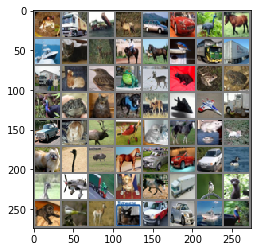

In [56]:
plt.show()

In [58]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [60]:
print(' '.join('%5s' % classes[label[j]] for j in range(64)))

 frog truck truck  deer   car   car  bird horse  ship   cat  deer horse horse  bird truck truck truck   cat  bird  frog  deer   cat  frog  frog  bird  frog   cat   dog  deer plane plane truck   car   cat  deer plane   cat horse   cat   cat   dog  bird  bird horse   car   car   car  bird  bird plane truck   dog horse truck  bird  bird   dog  bird  deer   cat   car   car  ship  bird


In [61]:
output = model(Variable(data))

In [62]:
_,predict = output.data.max(1)

In [63]:
print(' '.join('%5s' % classes[predict[j]] for j in range(64)))

 frog truck truck  deer   car   car  bird horse  ship   cat  deer horse horse  bird truck truck truck   cat  bird truck  deer   cat  frog  frog  bird  frog   cat   dog  deer plane plane truck   car   dog  deer   car   cat horse   dog plane   dog  bird  bird horse   car   car   car plane  bird plane truck   dog truck truck  bird   cat   dog  frog  deer   cat   car   car  ship  bird
